In [2]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants
%matplotlib inline

In [3]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJ1'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJ2'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('C'), ['GND', '1'])
        
phi = QVariable('φ')
phixH = QVariable('φxH')
phixE = QVariable('φxE')
#phix2 = QVariable('φx2')
phi.create_grid(32, 1)
FQ3JJ.add_variable(phi)
FQ3JJ.add_variable(phixH)
FQ3JJ.add_variable(phixE)
#FQ3JJ.add_variable(phix2)
#FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
#                       ['φ', 'φx1', 'φx2'], 
#                       np.asarray([[0,0,0],[1,0,0],[1,1,0],[1,1,1]]))

FQ3JJ.map_nodes_linear(['GND', '1', '2'], 
                       ['φ', 'φxH', 'φxE'], 
                       np.asarray([[0,0,1],[1,0,0],[0,1,1]]))

#EjEc_ratio = 80
flux_steps = 1
voltage_steps = 128
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
energies = np.zeros((voltage_steps,4), dtype=np.float)

Ej = 1e9
#Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
Ec = 1e9*16
FQ3JJ.find_element('JJ1').set_critical_current(Ej)
FQ3JJ.find_element('JJ2').set_critical_current(Ej)
FQ3JJ.find_element('C').set_capacitance(2/Ec)
phixH_value = np.pi*2/3

for nxE_id, nxE_value in enumerate(np.linspace(-2, 2, voltage_steps)):
#for phix_id, phix_value in enumerate(np.linspace(-0.5*np.pi, 0.5*np.pi, flux_steps)):
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    phixH.set_parameter(phixH_value, 0)
    phixE.set_parameter(0, nxE_value)
        #phix2.set_parameter(phix2_value, 0)
    FQ3JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
    #energies[phix1_id, phix2_id, :] = eigenenergies
    energies[nxE_id, :] = eigenenergies
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

C:\Users\ilia\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:46: ComplexWarning: Casting complex values to real discards the imaginary part


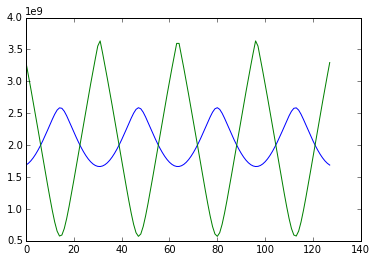

In [17]:
plt.plot((energies[:,1]-energies[:,0]))
plt.plot((energies[:,2]-energies[:,1]))
#plt.plot((energies[:,3]-energies[:,2]))

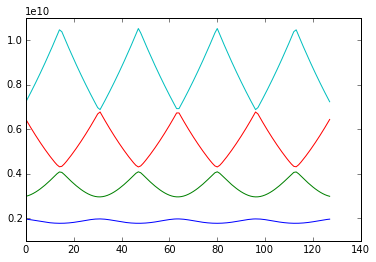

In [27]:
plt.plot(energies)